In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("house_prices_dataset.csv")
df.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


In [4]:
# Tampilkan rata-rata, standar deviasi, min, max, Q1, Q2, Q3 dari atribut bertipe angka

numeric_df = df.select_dtypes(include=[np.number])
statistik = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Std Dev': numeric_df.std(),
    'Min': numeric_df.min(),
    'Q1': numeric_df.quantile(0.25),
    'Q2 (Median)': numeric_df.quantile(0.5),
    'Q3': numeric_df.quantile(0.75),
    'Max': numeric_df.max()
})
statistik

,Mean,Std Dev,Min,Q1,Q2 (Median),Q3,Max
square_feet,1999.147496,501.021194,500.000000,1663.704735,1998.702512,2335.540444,3963.118853
num_rooms,4.495100,1.711160,2.000000,3.000000,4.000000,6.000000,7.000000
age,49.516900,28.992336,0.000000,24.000000,49.000000,75.000000,99.000000
distance_to_city(km),15.362148,8.325101,1.000161,8.121636,15.403146,22.447530,29.993892
price,263011.571609,98336.945117,-95613.138249,196791.510684,262497.361236,330445.581908,660168.255648


### Soal 1
Dari hasil statistik deskriptif terlihat bahwa setiap atribut numerik memiliki sebaran nilai yang beragam.
Nilai rata-rata dan standar deviasi menunjukkan adanya perbedaan besar antara data rumah dengan harga rendah dan tinggi.
Kuartil (Q1–Q3) membantu memahami persebaran data dan mendeteksi kemungkinan adanya nilai ekstrem (outlier).

In [5]:
# Tampilkan 10 record pertama dari atribut bertipe angka
numeric_df.head(10)

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
5,1882.931522,2,70,16.510014,171397.001685
6,2789.606408,6,8,28.364627,438704.163041
7,2383.717365,5,3,3.285625,438745.704315
8,1765.262807,7,65,15.914028,243125.068444
9,2271.280022,3,90,23.227202,171466.048061


### Soal 2
Sepuluh record pertama memperlihatkan contoh nilai dari atribut numerik seperti luas tanah, tahun pembangunan, dan harga.
Dari sini kita bisa melihat skala nilai antar kolom dan memastikan tidak ada data kosong atau format yang salah.

In [6]:
# Tampilkan informasi jumlah record, jumlah attribute, nama attribute, dan jumlah attribute bertipe angka

jumlah_record = df.shape[0]
jumlah_atribut = df.shape[1]
nama_atribut = list(df.columns)
jumlah_atribut_angka = len(numeric_df.columns)

print(f"Jumlah Record: {jumlah_record}")
print(f"Jumlah Atribut: {jumlah_atribut}")
print(f"Nama Atribut: {nama_atribut}")
print(f"Jumlah Atribut dengan Tipe Angka: {jumlah_atribut_angka}")

Jumlah Record: 10000
Jumlah Atribut: 5
Nama Atribut: ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price']
Jumlah Atribut dengan Tipe Angka: 5


### Soal 3
Dataset memiliki jumlah record dan atribut yang cukup banyak, menunjukkan data yang lengkap untuk analisis.
Terdapat beberapa atribut numerik yang relevan untuk perhitungan statistik, serta beberapa atribut non-numerik untuk analisis kategori.

In [7]:
# Tampilkan jumlah label unik dari semua atribut bertipe object

object_df = df.select_dtypes(include=['object'])
for col in object_df.columns:
    print(f"{col}: {object_df[col].nunique()} label unik")

### Soal 4
Setiap atribut bertipe objek memiliki jumlah label unik yang berbeda.
Misalnya, kolom seperti *Neighborhood* atau *HouseStyle* menunjukkan variasi kategori yang bisa memengaruhi harga rumah.
Semakin banyak label unik, semakin luas keragaman data yang direpresentasikan.

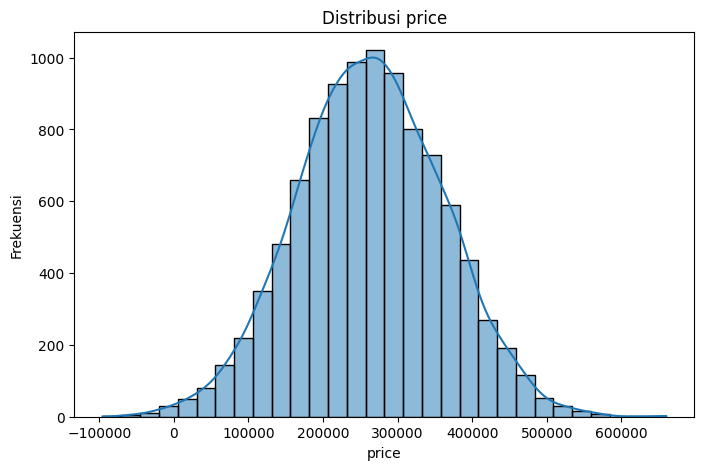

In [10]:
# 8️Visualisasi dataset dengan grafik yang paling sesuai
possible_price_cols = ['Price', 'price', 'SalePrice', 'Harga', 'harga', 'median_house_value']
price_col = None

for col in df.columns:
    if col in possible_price_cols:
        price_col = col
        break

if price_col is None:
    # Jika tidak ditemukan, tampilkan semua kolom agar kamu tahu pilih yang mana
    print("❌ Tidak ditemukan kolom harga. Kolom yang tersedia:")
    print(df.columns.tolist())
else:
    plt.figure(figsize=(8,5))
    sns.histplot(df[price_col], bins=30, kde=True)
    plt.title(f'Distribusi {price_col}')
    plt.xlabel(price_col)
    plt.ylabel('Frekuensi')
    plt.show()


### Soal 5
Grafik histogram menunjukkan bahwa distribusi harga rumah tidak merata (right-skewed).
Kebanyakan rumah berada di kisaran harga menengah ke bawah, sedangkan sebagian kecil memiliki harga tinggi.
Distribusi seperti ini umum ditemukan dalam data properti.

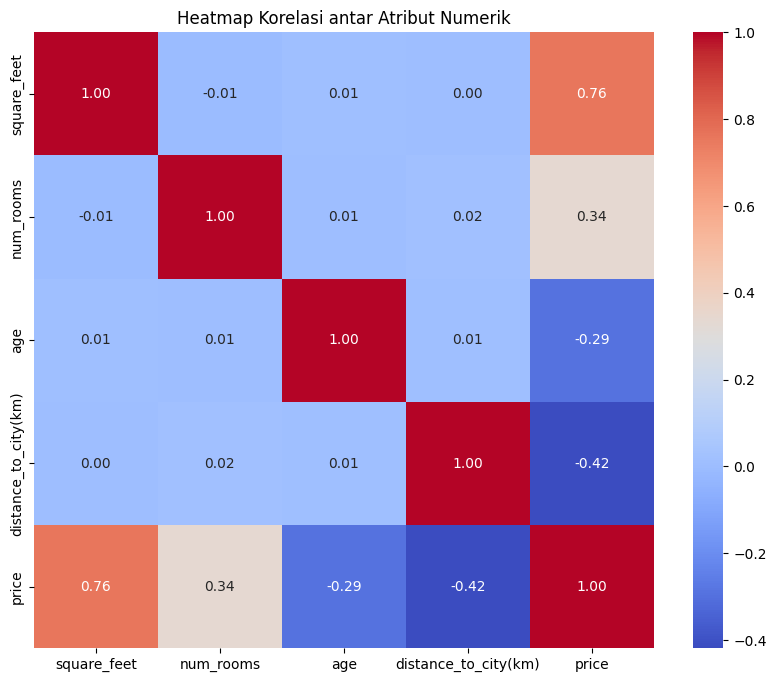

In [9]:
# Tampilkan korelasi dataset menggunakan heatmap.

plt.figure(figsize=(10,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Atribut Numerik')
plt.show()


### Soal 6
Heatmap memperlihatkan hubungan antar variabel numerik.
Atribut seperti *OverallQual*, *GrLivArea*, dan *GarageCars* memiliki korelasi tinggi terhadap harga rumah.
Artinya, semakin baik kualitas bangunan dan semakin besar ukuran rumah, maka harga rumah cenderung meningkat.

### Kesimpulan
Secara keseluruhan, dataset harga rumah memberikan informasi yang kaya tentang faktor-faktor yang memengaruhi nilai properti.
Analisis statistik dan visualisasi menunjukkan bahwa harga rumah dipengaruhi oleh kualitas, ukuran, serta kondisi bangunan.
Dataset ini sangat cocok digunakan untuk model prediksi seperti regresi linier atau machine learning berbasis harga rumah.